##### Author: Pablo Iañez Picazo
##### Biomedical Data Science lab

In [1]:
# Load all the necessary libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from statannotations.Annotator import Annotator

# Supress all warnings
import warnings

warnings.filterwarnings("ignore")

import sys

sys.path.append("/home/pianez/phd/projects/hsc_nucleus/hsc_rhoa")
from methods import hsc_spatial_stats as hsc
from globals import batches_out, new_names

In [2]:
sns.set(rc={"figure.figsize": (20, 16)})
sns.set_style("whitegrid")

In [3]:
# ------------------------ Set up some parameters --------------------------- #
# Image resolution after resizing, which is 5 micrometers per pixel
res = 0.1
# cluster forming threshold - threshold at which intensities above this value
# will be considered belonging to a DAPI-Intense Region (DIR)
# Intensities to 0.6 are the one in the quantile 0.80 in young, old and treated
cft = 0.6
normalization = "z_score"
folder = "data"
conditions = [
    "young",
    "old",
    "treated_RhoAi",
]

palette = {"Young": "w", "Aged": "k", "Aged + Ri": "b", "8μm": "r"}

In [4]:
nuc_df = pd.read_csv(
    f"results/z_score_nuclei_3d_res{res}_cf{cft}_filt_df.csv", index_col=0
)
nuc_df = hsc.fix_labels(nuc_df)

In [5]:
test = nuc_df[nuc_df["condition"].isin(["8μm", "5μm"])]
pd.unique(test["im_batch"])

array(['20220530exp_20220615_8umRhoGTPTAZlooks like 8',
       '20220527exp_20220615_8umRhoGTPTAZ',
       '20220525exp_20220610_RhoGTPTAZ_B_8um',
       '20220921exp_5um_Bppla2h3k9me2_2',
       '20220530exp_20220615_8umRhoGTPTAZlooks like 5',
       '20220525exp_20220610_RhoGTPTAZ_B_5um',
       '20220510exp_220519_conf4.8_1', '20220510exp_220519_conf4.8_2'],
      dtype=object)

In [6]:
print(nuc_df.shape)
nuc_df = nuc_df[~nuc_df["im_batch"].isin(batches_out)]
print(nuc_df.shape)

(837, 92)
(780, 92)


In [7]:
DIRs_feats = [
    "DIRs height",
    "DIRs major axis length",
    "DIRs centroid distance to border",
    "number of DIRs",
]

morph_feats = [
    "volume",
    "equivalent diameter",
    "surface area",
    "DIRs volume",
    "DIRs centroid distance to border",
    "largest slide area",
    "largest slide perimeter",
    "intensity 0-0.5µm",
    "intensity 1-1.5µm",
]

nuc_df = nuc_df[
    nuc_df["condition"].isin(["Young", "Aged", "Aged + Ri", "8μm", "5μm"])
]

nuc_df = nuc_df.rename(columns=new_names)
nuc_df["DIRs distance to border"] = nuc_df["DIRs distance to border"] * res

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Young vs. Aged: Mann-Whitney-Wilcoxon test two-sided, P_val:1.506e-02 U_stat=1.230e+04
Aged vs. Aged + Ri: Mann-Whitney-Wilcoxon test two-sided, P_val:7.690e-03 U_stat=1.389e+04
Young vs. Aged + Ri: Mann-Whitney-Wilcoxon test two-sided, P_val:8.066e-01 U_stat=1.295e+04


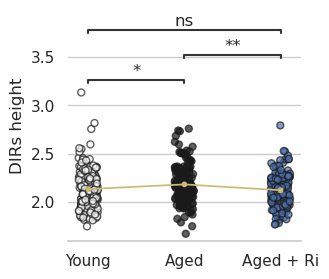

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Young vs. Aged: Mann-Whitney-Wilcoxon test two-sided, P_val:1.697e-02 U_stat=1.234e+04
Aged vs. Aged + Ri: Mann-Whitney-Wilcoxon test two-sided, P_val:1.430e-03 U_stat=1.430e+04
Young vs. Aged + Ri: Mann-Whitney-Wilcoxon test two-sided, P_val:4.351e-01 U_stat=1.339e+04


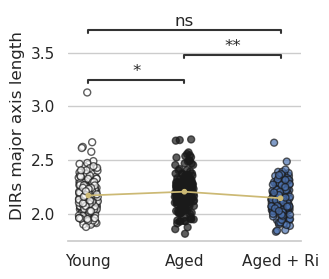

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Young vs. Aged: Mann-Whitney-Wilcoxon test two-sided, P_val:8.640e-03 U_stat=1.212e+04
Aged vs. Aged + Ri: Mann-Whitney-Wilcoxon test two-sided, P_val:2.338e-01 U_stat=1.274e+04
Young vs. Aged + Ri: Mann-Whitney-Wilcoxon test two-sided, P_val:1.758e-01 U_stat=1.162e+04


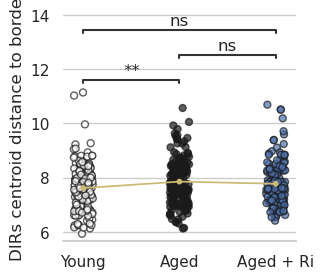

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Young vs. Aged: Mann-Whitney-Wilcoxon test two-sided, P_val:2.996e-01 U_stat=1.546e+04
Aged vs. Aged + Ri: Mann-Whitney-Wilcoxon test two-sided, P_val:1.160e-02 U_stat=9.844e+03
Young vs. Aged + Ri: Mann-Whitney-Wilcoxon test two-sided, P_val:1.471e-01 U_stat=1.155e+04


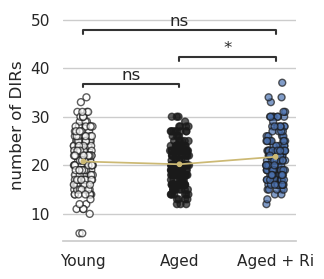

In [8]:
subset_df = nuc_df[nuc_df["condition"].isin(["Young", "Aged", "Aged + Ri"])]
subset_df = subset_df.reset_index(drop=True)

# Drop columns that contain NaN values
subset_df = subset_df.dropna()

pairs = [("Young", "Aged"), ("Aged", "Aged + Ri"), ("Young", "Aged + Ri")]

sns.set(rc={"lines.linewidth": 0.7})
sns.set_style("whitegrid")

for m in DIRs_feats:
    fig, ax = plt.subplots(figsize=(3, 3))
    sns.stripplot(
        data=subset_df,
        x="condition",
        y=m,
        hue="condition",
        dodge=False,
        palette=palette,
        edgecolor="k",
        linewidth=1,
        alpha=0.7,
        zorder=1,
        size=5,
        ax=ax,
    )
    b = sns.pointplot(
        data=subset_df,
        x="condition",
        y=m,
        ax=ax,
        dodge=False,
        color="y",
        errorbar="se",
    )

    # If seaborn keeps plotting in a separate axis, use plt.gca() to get current axis
    annotator = Annotator(
        ax=b, data=subset_df, x="condition", y=m, pairs=pairs
    )
    annotator.configure(
        test="Mann-Whitney",
        text_format="star",
        loc="inside",
    )
    annotator.apply_and_annotate()

    # Delete the legend
    b.get_legend().remove()
    b.set_xlabel(None)
    sns.despine(left=True)
    plt.show()

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Young vs. Aged: Mann-Whitney-Wilcoxon test two-sided, P_val:2.757e-05 U_stat=1.070e+04
Aged vs. 8μm: Mann-Whitney-Wilcoxon test two-sided, P_val:3.285e-03 U_stat=7.890e+02
Young vs. 8μm: Mann-Whitney-Wilcoxon test two-sided, P_val:5.177e-05 U_stat=6.090e+02


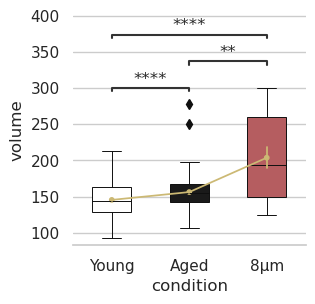

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Young vs. Aged: Mann-Whitney-Wilcoxon test two-sided, P_val:2.757e-05 U_stat=1.070e+04
Aged vs. 8μm: Mann-Whitney-Wilcoxon test two-sided, P_val:3.285e-03 U_stat=7.890e+02
Young vs. 8μm: Mann-Whitney-Wilcoxon test two-sided, P_val:5.177e-05 U_stat=6.090e+02


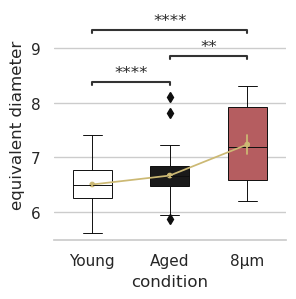

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Young vs. Aged: Mann-Whitney-Wilcoxon test two-sided, P_val:5.535e-06 U_stat=1.038e+04
Aged vs. 8μm: Mann-Whitney-Wilcoxon test two-sided, P_val:5.054e-03 U_stat=8.170e+02
Young vs. 8μm: Mann-Whitney-Wilcoxon test two-sided, P_val:1.840e-04 U_stat=6.770e+02


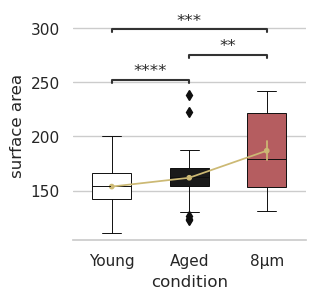

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Young vs. Aged: Mann-Whitney-Wilcoxon test two-sided, P_val:3.795e-04 U_stat=1.128e+04
Aged vs. 8μm: Mann-Whitney-Wilcoxon test two-sided, P_val:7.088e-06 U_stat=4.700e+02
Young vs. 8μm: Mann-Whitney-Wilcoxon test two-sided, P_val:5.296e-07 U_stat=3.950e+02


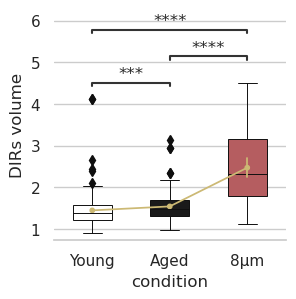

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Young vs. Aged: Mann-Whitney-Wilcoxon test two-sided, P_val:8.640e-03 U_stat=1.212e+04
Aged vs. 8μm: Mann-Whitney-Wilcoxon test two-sided, P_val:2.564e-11 U_stat=2.200e+01
Young vs. 8μm: Mann-Whitney-Wilcoxon test two-sided, P_val:1.931e-11 U_stat=2.000e+01


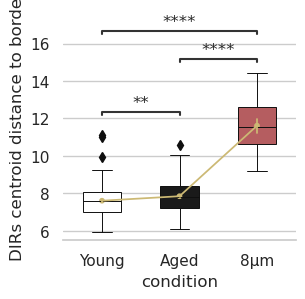

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Young vs. Aged: Mann-Whitney-Wilcoxon test two-sided, P_val:6.946e-07 U_stat=1.000e+04
Aged vs. 8μm: Mann-Whitney-Wilcoxon test two-sided, P_val:6.083e-02 U_stat=1.008e+03
Young vs. 8μm: Mann-Whitney-Wilcoxon test two-sided, P_val:7.177e-04 U_stat=7.560e+02


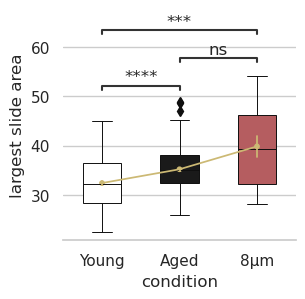

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Young vs. Aged: Mann-Whitney-Wilcoxon test two-sided, P_val:7.972e-06 U_stat=1.045e+04
Aged vs. 8μm: Mann-Whitney-Wilcoxon test two-sided, P_val:1.419e-01 U_stat=1.092e+03
Young vs. 8μm: Mann-Whitney-Wilcoxon test two-sided, P_val:4.201e-03 U_stat=8.710e+02


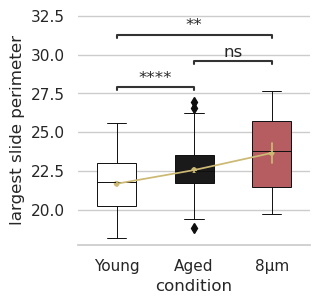

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Young vs. Aged: Mann-Whitney-Wilcoxon test two-sided, P_val:4.557e-02 U_stat=1.633e+04
Aged vs. 8μm: Mann-Whitney-Wilcoxon test two-sided, P_val:2.975e-10 U_stat=2.690e+03
Young vs. 8μm: Mann-Whitney-Wilcoxon test two-sided, P_val:1.517e-10 U_stat=2.921e+03


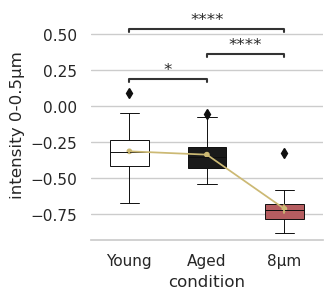

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Young vs. Aged: Mann-Whitney-Wilcoxon test two-sided, P_val:3.610e-05 U_stat=1.076e+04
Aged vs. 8μm: Mann-Whitney-Wilcoxon test two-sided, P_val:6.108e-09 U_stat=1.980e+02
Young vs. 8μm: Mann-Whitney-Wilcoxon test two-sided, P_val:9.433e-10 U_stat=1.510e+02


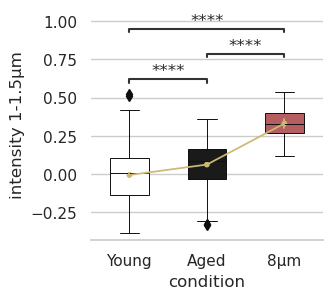

In [10]:
subset_df = nuc_df[nuc_df["condition"].isin(["Young", "Aged", "8μm"])]
subset_df = subset_df.reset_index(drop=True)

pairs = [("Young", "Aged"), ("Aged", "8μm"), ("8μm", "Young")]

for m in morph_feats:
    fig, ax = plt.subplots(figsize=(3, 3))
    sns.boxplot(
        data=subset_df,
        x="condition",
        y=m,
        hue="condition",
        dodge=False,
        palette=palette,
        width=0.5,
        zorder=1,
        ax=ax,
    )
    b = sns.pointplot(
        data=subset_df,
        x="condition",
        y=m,
        ax=ax,
        dodge=False,
        color="y",
        errorbar="se",
    )

    # If seaborn keeps plotting in a separate axis, use plt.gca() to get current axis
    annotator = Annotator(
        ax=b, data=subset_df, x="condition", y=m, pairs=pairs
    )
    annotator.configure(
        test="Mann-Whitney",
        text_format="star",
        loc="inside",
        # comparisons_correction="Bonferroni"
    )
    annotator.apply_and_annotate()

    # Delete the legend
    b.get_legend().remove()
    sns.despine(left=True)
    plt.show()